# Simulaciones capitulo 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
#%matplotlib widget

In [2]:
def position_points(array):
    fig, ax = plt.subplots()
    ax.scatter(array[:,:-1], array[:,1:], alpha=.7, color='black', s = 80)
    ax.axis('equal')
    plt.show()

In [3]:
def len_draw(r1, r2, width):
    
    r2 = -r2
    # equation 1
    
    if r1 <= r2:
        # len 1
        x1   = np.linspace(-(r1),0, 500)
        eq1  = np.sqrt( (r1 ** 2) - (x1 ** 2) )
        
        # len 2
        h2   = -np.sqrt( (r2 ** 2) - (r1 ** 2))
        x2   = np.linspace(0,r2+h2, 500)
        eq2  = np.sqrt( (r2 ** 2) - ( (x2 - h2) ** 2) )
    else:
        # len 1
        h1   = np.sqrt( (r1 ** 2) - (r2 ** 2))
        x1   = np.linspace(-r1+h1,0, 500)
        eq1  = np.sqrt( (r1 ** 2) - ( (x1 - h1) ** 2) )
        
        # len 2
        x2   = np.linspace(0,r2, 500)
        eq2  = np.sqrt( (r2 ** 2) - (x2 ** 2) )
        
    # simetric equation 1
    eq12 = np.concatenate(( np.flip(eq1), -eq1 ))
    x12  = np.concatenate(( np.flip(x1), x1 ))
    
    # simetric equation 2
    eq21 = np.concatenate(( np.flip(eq2), -eq2 ))
    x21  = np.concatenate(( np.flip(x2), x2 ))
    
    # draw
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.fill(x12, eq12,facecolor= '#5072A7', alpha = 0.5, label = 'R1')
    ax.fill(x21, eq21,facecolor= '#CD5C5C', alpha = 0.5, label = 'R2')
    ax.legend()
    plt.show()

In [4]:
def matrix_points(p):
    #x son los puntos sobre el eje x
    x = list(np.array(p)[:,0])
    y = list(np.array(p)[:,1])
    
    #subm_1 es la submatriz compuesta de vectores fila de x
    subm_1x = np.array(x*len(x)).reshape(len(x),len(x))
    subm_1y = np.array(y*len(y)).reshape(len(y),len(y))
    
    #subm_2 es la submatriz compuesta de vectores columna repitiendo x
    subm_2x = np.transpose(subm_1x)
    subm_2y = np.transpose(subm_1y)
    
    #xi_a es el promedio de cada punto en x con cada uno de los demas puntos
    xi_a = (subm_1x+subm_2x)/2
    eta_a = (subm_1y+subm_2y)/2
    
    #xi_d es la distancia de cada punto con cada uno de los demas puntos
    xi_d = subm_2x-subm_1x
    eta_d = subm_2y-subm_1y
    
    #vectores de las matrices xi_a y xi_d
    xi_av = list(xi_a.reshape(1,len(xi_a)**2))
    xi_dv = list(xi_d.reshape(1,len(xi_d)**2))
    eta_av = list(eta_a.reshape(1,len(eta_a)**2))
    eta_dv = list(eta_d.reshape(1,len(eta_d)**2))
    
    #matriz con todas las parejas de puntos xi_a y xi_d
    xi_m = np.transpose(np.array(xi_av+xi_dv+eta_av+eta_dv)).reshape(len(x),len(x),4)
    return xi_m

In [5]:
def GeometricPotencial_3D_00_reducido(xa, xi_a, xi_d, ya, eta_a, eta_d, za, wa, c, R1, R2):
    #constantes
    pic = 1 / ((4*np.pi) ** 2)
    k = ((2*np.pi)/wa)
    n = 1.5 #refractive index
    
    xi_p, xi_n = xi_a+(xi_d)/2, xi_a-(xi_d)/2
    eta_p, eta_n = eta_a+(eta_d)/2, eta_a-(eta_d)/2
    
    normPlus  = (xi_p**2) + (eta_p**2)
    normMinus = (xi_n**2) + (eta_n**2)
    
    
    # fase dentro y fuera de la lente para +
    if (normPlus > (R1 ** 2)) or (normPlus > (R2 ** 2)):
        phase_plus = 0
    else:
        phase_plus  = R1 * np.sqrt(1 - (normPlus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normPlus / (R2 ** 2)) + 0j)
        
    # fase dentro y fuera de la lente para -
    if (normMinus > (R1 ** 2)) or (normMinus > (R2 ** 2)):
        phase_minus = 0
    else:
        phase_minus = R1 * np.sqrt(1 - (normMinus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normMinus / (R2 ** 2)) + 0j)
    
    phase = np.exp(1j*(n-1)*k*phase_plus*c) * np.exp(-1j*(n-1)*k*phase_minus*c)
    
    #distancia s
    s_1 = np.sqrt(((xa-xi_p) ** 2) + ((ya-eta_p) **2) + ((za) ** 2))
    s_2 = np.sqrt(((xa-xi_n) **2) + ((ya-eta_n) ** 2) + ((za) ** 2))
    
    #kernel
    kernel_0 = 2*((k**2)*pic) * ((za+s_1)/(s_1 ** 2)) * ((za+s_2)/(s_2 ** 2)) * np.exp(1j*k*s_1-1j*k*s_2) * phase 

    kernel = np.real(kernel_0)
    
    #print(phase)
    return kernel

def GeometricPotencial_3D_Real(xa, ya, za, p, wa,c,R1,R2):
    sum_r = 0
    matrix_complete = matrix_points(p)
    matrix_real = np.einsum('iij->ij', matrix_complete)
    for i in matrix_real:
        sum_r = sum_r + GeometricPotencial_3D_00_reducido(xa,i[0],i[1],ya,i[2],i[3],za,wa,c,R1,R2)
#         sum_r = sum_r + GeometricPotencial_3D_00_reducido(xa,i[0],i[1],ya,i[2],i[3],za,wa,c,R1,R2) * (z**2)
    return sum_r

def GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,c,R1,R2):
    sum_v = 0
    matrix_complete = matrix_points(p)
    matrix_virtual = []
    
    for i in range(0,len(matrix_complete)):
        for j in range(0,len(matrix_complete)):
            if i != j:
                matrix_virtual.append(list(matrix_complete[i,j]))
    
    matrix_virtual = np.array(matrix_virtual)
    
    for k in matrix_virtual:
        sum_v = sum_v + GeometricPotencial_3D_00_reducido(xa,k[0],k[1],ya,k[2],k[3],za,wa,c,R1,R2)
#         sum_v = sum_v + GeometricPotencial_3D_00_reducido(xa,k[0],k[1],ya,k[2],k[3],za,wa,c,R1,R2) * (z**2)
    return sum_v

def GeometricPotencial_3D_reducido(xa, ya, za, p, wa,c,R1,R2):
    sum_t = 0*GeometricPotencial_3D_Real(xa, ya, za, p, wa,c,R1,R2) + 1*GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,c,R1,R2)
    return sum_t

posición aproximada del foco:  1.2500000000000003e-06 ||| a maximo:  1.7677669529663689


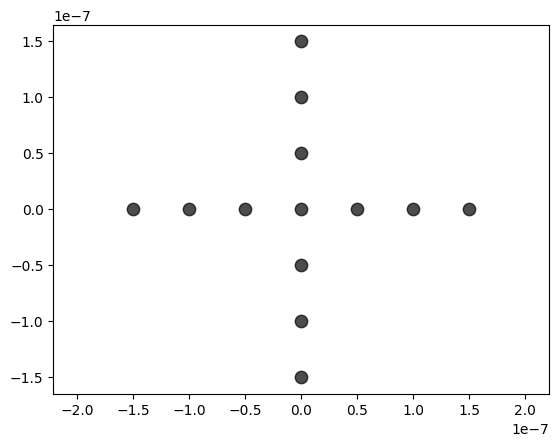

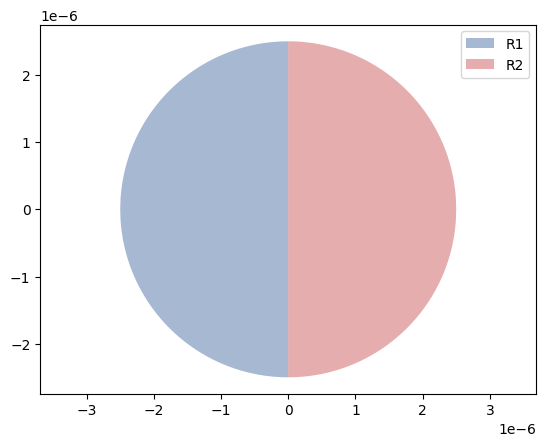

In [6]:
w      = 500 * (10 ** -9)
r1     = 5*w
r2     = -5*w
a      = .1 * w
#points = np.array([[0,0],[a,0],[-a,0],[2*a,0],[3*a,0],[-2*a,0],[-3*a,0],[0,a],[0,2*a],[0,3*a],[0,-a],[0,-2*a],[0,-3*a],[a,a],[a,2*a],[a,3*a],[a,-a],[a,-2*a],[a,-3*a],[-a,a],[-a,2*a],[-a,3*a],[-a,-a],[-a,-2*a],[-a,-3*a],[2*a,a],[2*a,2*a],[2*a,3*a],[2*a,-a],[2*a,-2*a],[2*a,-3*a],[-2*a,a],[-2*a,2*a],[-2*a,3*a],[-2*a,-a],[-2*a,-2*a],[-2*a,-3*a],[3*a,a],[3*a,2*a],[3*a,3*a],[3*a,-a],[3*a,-2*a],[3*a,-3*a],[-3*a,a],[-3*a,2*a],[-3*a,3*a],[-3*a,-a],[-3*a,-2*a],[-3*a,-3*a]])
# points = np.array([[0,0],[2*a,0],[-2*a,0],[0,2*a],[0,-2*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[a,0],[-a,0],[0,a],[0,-a]])
points = np.array([[0,0],[2*a,0],[-2*a,0],[0,2*a],[0,-2*a],[3*a,0],[-3*a,0],[0,3*a],[0,-3*a],[a,0],[-a,0],[0,a],[0,-a]])

paraxial_aprox = (((1/r1) - (1/r2))) ** -1
print('posición aproximada del foco: ', paraxial_aprox, '||| a maximo: ',np.sqrt(25/8))

position_points(points)
len_draw(r1,r2,0)

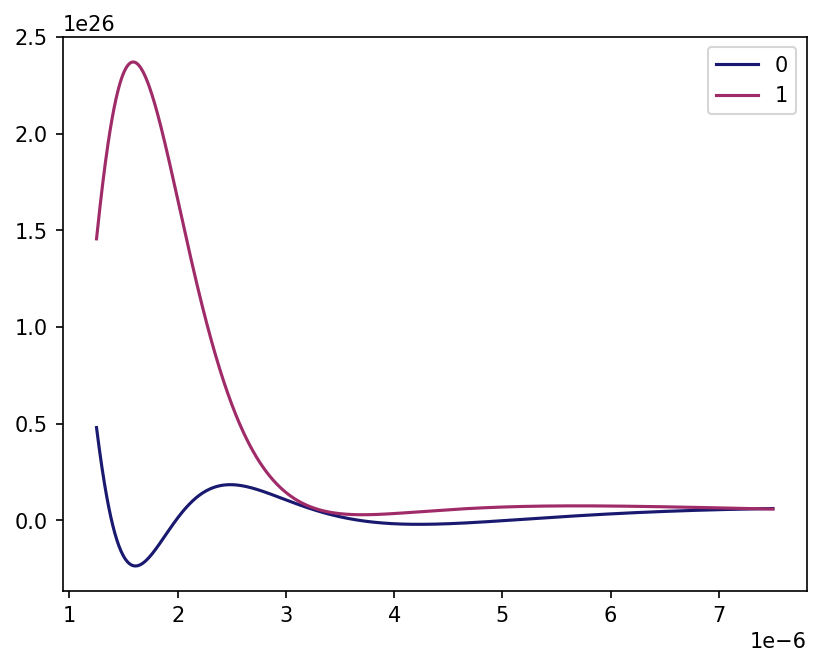

CPU times: user 172 ms, sys: 286 ms, total: 458 ms
Wall time: 153 ms


In [7]:
%%time
zzz = np.linspace(2.5*w, 15*w, 1000)
z_plot_0 = np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*11.78,w,0,r1,r2)), dtype=float)
z_plot_1 = np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*11.78,w,1,r1,r2)), dtype=float)

fig, ax = plt.subplots(dpi=150)
ax.plot(zzz, z_plot_0, label="0", color="#191970")
ax.plot(zzz, z_plot_1, label="1", color="#9F2B68")
ax.legend()
# ax.set_title("a = 0.2")
# fig.suptitle('36 points, 2D, a = [0.25,1.178]', fontsize=16)
plt.show()

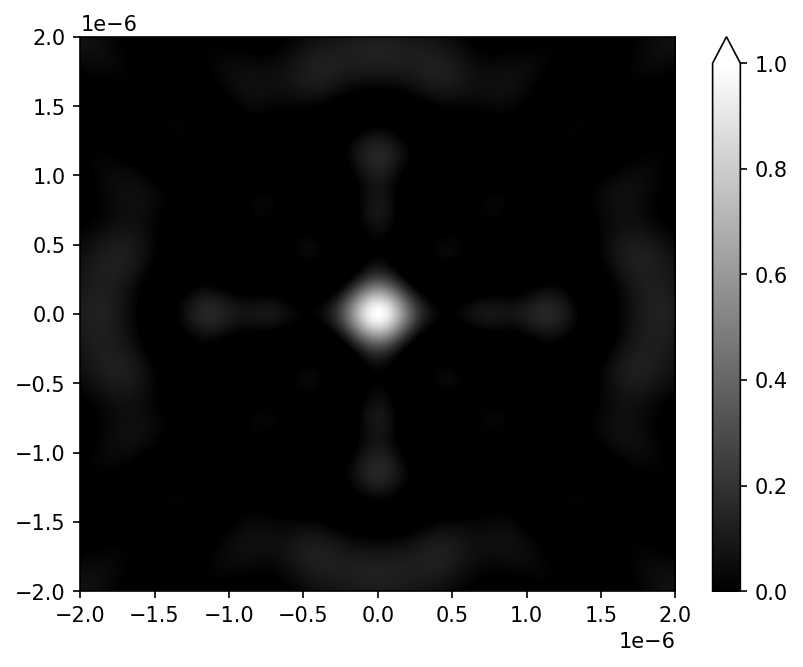

CPU times: user 2.75 s, sys: 1.13 s, total: 3.88 s
Wall time: 3.52 s


array([[ 0.000e+00,  0.000e+00],
       [ 1.110e-06,  0.000e+00],
       [-1.110e-06,  0.000e+00],
       [ 0.000e+00,  1.110e-06],
       [ 0.000e+00, -1.110e-06],
       [ 1.665e-06,  0.000e+00],
       [-1.665e-06,  0.000e+00],
       [ 0.000e+00,  1.665e-06],
       [ 0.000e+00, -1.665e-06],
       [ 5.550e-07,  0.000e+00],
       [-5.550e-07,  0.000e+00],
       [ 0.000e+00,  5.550e-07],
       [ 0.000e+00, -5.550e-07]])

In [8]:
%%time
x1, x2 = -4, 4
square = np.linspace(x1*w, x2*w, 500)
dz = 1.84 * (10 ** -6)


xx, yy = np.meshgrid(square, square)
zz = np.array(list(GeometricPotencial_3D_reducido(xx, yy, dz, points*11.78, w,1,r1,r2)), dtype=float)

z_mi, z_ma = zz.min(), zz.max()

zz = zz/ z_ma

fig, (ax) = plt.subplots(dpi=150)

c = ax.imshow(zz,vmin=0, vmax=1, cmap = 'gray', extent=[x1*w, x2*w, x1*w,x2*w], 
              aspect='auto', interpolation = 'bicubic')

fig.colorbar(c, ax=ax, extend='max')
#plt.savefig("Geometric Potencial_coherence")
plt.show()
points*11.1

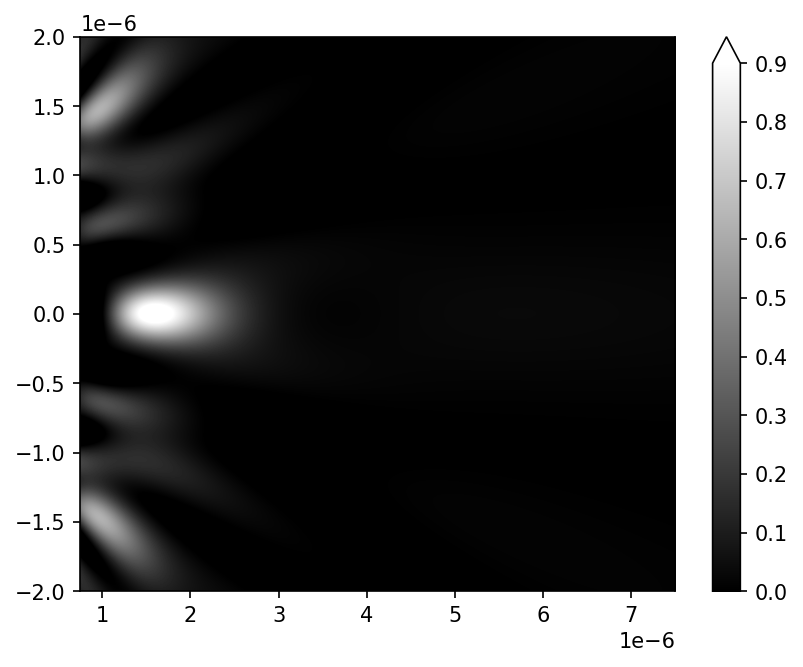

CPU times: user 2.65 s, sys: 1.19 s, total: 3.84 s
Wall time: 3.35 s


array([[ 0.000e+00,  0.000e+00],
       [ 1.178e-06,  0.000e+00],
       [-1.178e-06,  0.000e+00],
       [ 0.000e+00,  1.178e-06],
       [ 0.000e+00, -1.178e-06],
       [ 1.767e-06,  0.000e+00],
       [-1.767e-06,  0.000e+00],
       [ 0.000e+00,  1.767e-06],
       [ 0.000e+00, -1.767e-06],
       [ 5.890e-07,  0.000e+00],
       [-5.890e-07,  0.000e+00],
       [ 0.000e+00,  5.890e-07],
       [ 0.000e+00, -5.890e-07]])

In [9]:
%%time
x1, x2 = -4, 4
z1, z2 = 1.5, 15
square = np.linspace(x1*w, x2*w, 500)
dz = np.linspace(z1*w, z2*w, 500)


z, xx = np.meshgrid(dz, square)
zz = np.array(list(GeometricPotencial_3D_reducido(xx, 0, z, points*11.78, w,1,r1,r2)), dtype=float)

z_mi, z_ma = zz.min(), zz.max()

zz = zz/ z_ma

fig, (ax) = plt.subplots(dpi=150)

c = ax.imshow(zz,vmin=0, vmax=.9, cmap = 'gray', extent=[z1*w, z2*w, x1*w,x2*w], 
              aspect='auto', interpolation = 'bicubic')

fig.colorbar(c, ax=ax, extend='max')
#plt.savefig("Geometric Potencial_coherence")
plt.show()
points*11.78

## Puntos virtuales

In [10]:
# todos, par e impar
a = 1.500000000000017e-06   
points_v = np.array([[0,0],[a,0],[-a,0]])
#points_v = np.array([[0,0],[-a,0]])

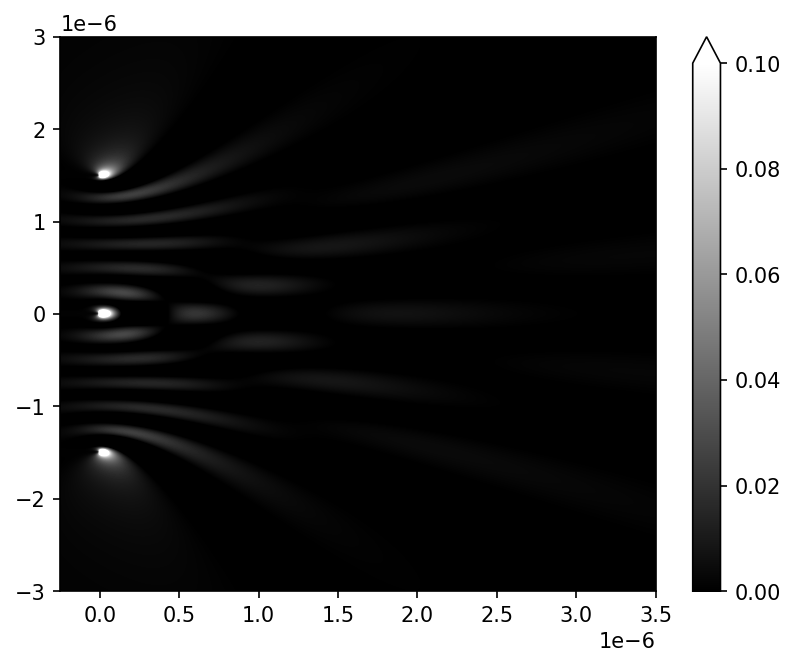

CPU times: user 405 ms, sys: 383 ms, total: 788 ms
Wall time: 401 ms


In [11]:
%%time
x1, x2 = -6, 6
z1, z2 = -.5, 7
square = np.linspace(x2*w, x1*w, 500)
dz = np.linspace(z1*w, z2*w, 500)


z, xx = np.meshgrid(dz, square)
zz = np.array(list(GeometricPotencial_3D_reducido(xx, 0, z, points_v, w,0,r1,r2)), dtype=float)

z_mi, z_ma = zz.min(), zz.max()

zz = zz/ z_ma

fig, (ax) = plt.subplots(dpi=150)

c = ax.imshow(zz,vmin=0, vmax=.1, cmap = 'gray', extent=[z1*w, z2*w, x1*w,x2*w], 
              aspect='auto', interpolation = 'bicubic')

fig.colorbar(c, ax=ax, extend='max')
#plt.savefig("Geometric Potencial_coherence")
plt.show()

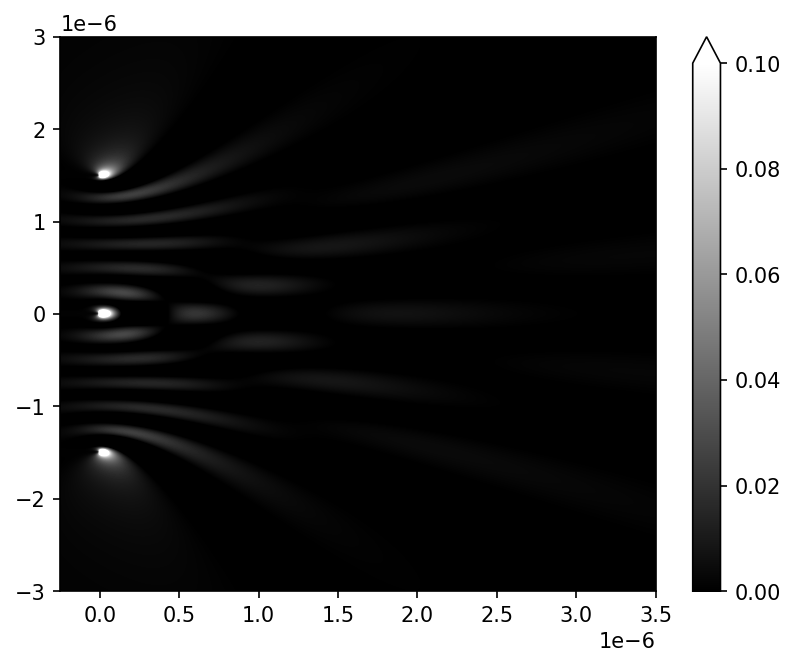

CPU times: user 406 ms, sys: 490 ms, total: 895 ms
Wall time: 396 ms


In [12]:
%%time
x1, x2 = -6, 6
z1, z2 = -.5, 7
square = np.linspace(x2*w, x1*w, 500)
dz = np.linspace(z1*w, z2*w, 500)


z, xx = np.meshgrid(dz, square)
zz = np.array(list(GeometricPotencial_3D_reducido(xx, 0, z, points_v, w,1,r1,r2)), dtype=float)

z_mi, z_ma = zz.min(), zz.max()

zz = zz/ z_ma

fig, (ax) = plt.subplots(dpi=150)

c = ax.imshow(zz,vmin=0, vmax=.1, cmap = 'gray', extent=[z1*w, z2*w, x1*w,x2*w], 
              aspect='auto', interpolation = 'bicubic')

fig.colorbar(c, ax=ax, extend='max')
#plt.savefig("Geometric Potencial_coherence")
plt.show()

for i in range(1,400):
    z, xx = np.meshgrid(dz, square)
    zz = np.array(list(GeometricPotencial_3D_reducido(xx, 0, z, points_v*(i*0.125), w,1,r1,r2)), dtype=float)
    
    z_mi, z_ma = zz.min(), zz.max()
    
    zz = zz/ z_ma
    
    fig, (ax) = plt.subplots(dpi=150)
    
    c = ax.imshow(zz,vmin=0, vmax=.1, cmap = 'gray', extent=[z1*w, z2*w, x1*w,x2*w], 
              aspect='auto', interpolation = 'bicubic')
    
    title = round((i*0.125)*0.1,3)
    
    if i < 10:
        filename = 'Animation/phase_focus_three_points00'+str(i)+'.png'
    elif i < 100:
        filename = 'Animation/phase_focus_three_points0'+str(i)+'.png'
    else:
        filename = 'Animation/phase_focus_three_points'+str(i)+'.png'
    
    ax.set_title("a = {}".format(title))
    
    plt.savefig(filename)
    
    if i == 1:
        print('0%')
    elif i == 100:
        print('25%')
    elif i == 200:
        print('50%')
    elif i == 300:
        print('75%')
    elif i == 399:
        print('100%')
        
plt.show()